## Gráfico da Função f(t) = 500 ℯ^(-0.1 x) sen(0.5 x)

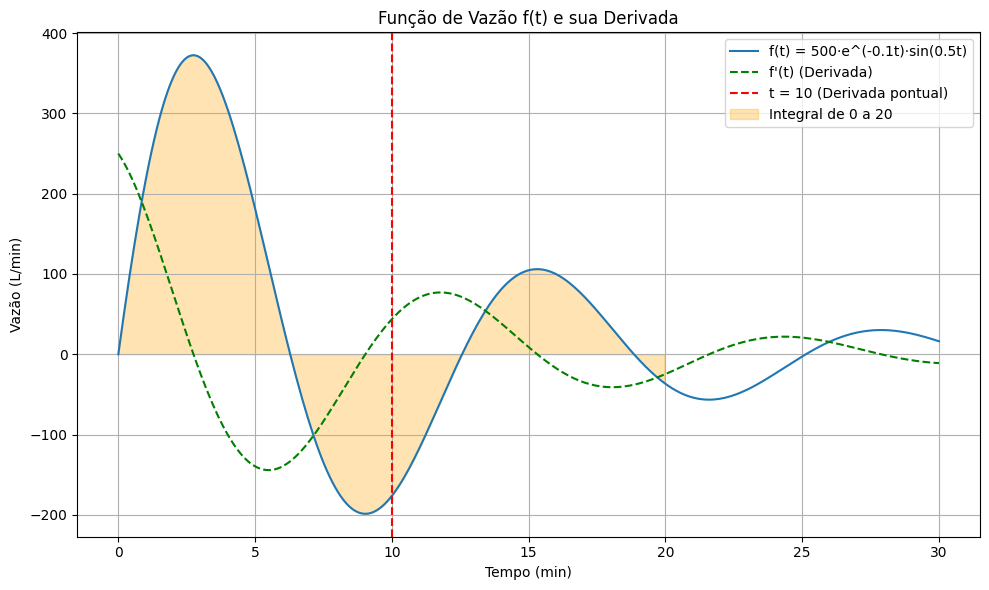

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sympy import symbols, diff, limit, oo, lambdify, sin, exp
import os

t = symbols('t', real=True)
f = 500 * exp(-0.1 * t) * sin(0.5 * t)

f_prime = diff(f, t)

limit_neg_inf = limit(f, t, -oo)
limit_pos_inf = limit(f, t, oo)

# Derivada em t = 10
f_prime_t10 = f_prime.subs(t, 10)

f_lambdified = lambdify(t, f, modules=['numpy'])
f_prime_lambdified = lambdify(t, f_prime, modules=['numpy'])

integral_result, _ = quad(f_lambdified, 0, 20)
t_vals = np.linspace(0, 30, 300)
f_vals = f_lambdified(t_vals)
f_prime_vals = f_prime_lambdified(t_vals)

plt.figure(figsize=(10, 6))
plt.plot(t_vals, f_vals, label="f(t) = 500·e^(-0.1t)·sin(0.5t)")
plt.plot(t_vals, f_prime_vals, color='green', label="f'(t) (Derivada)", linestyle='--')
plt.axvline(10, color='r', linestyle='--', label='t = 10 (Derivada pontual)')
plt.fill_between(t_vals[(t_vals >= 0) & (t_vals <= 20)], f_vals[(t_vals >= 0) & (t_vals <= 20)], alpha=0.3, color='orange', label='Integral de 0 a 20')
plt.title("Função de Vazão f(t) e sua Derivada")
plt.xlabel("Tempo (min)")
plt.ylabel("Vazão (L/min)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Simulação de alerta de risco

ALERTAS DE RISCO:
⚠️ Risco em t=0.70 min: vazão = 160.33 L/min
⚠️ Risco em t=0.80 min: vazão = 180.26 L/min
⚠️ Risco em t=0.90 min: vazão = 199.32 L/min
⚠️ Risco em t=1.00 min: vazão = 217.49 L/min
⚠️ Risco em t=1.10 min: vazão = 234.74 L/min
⚠️ Risco em t=1.20 min: vazão = 251.03 L/min
⚠️ Risco em t=1.30 min: vazão = 266.35 L/min
⚠️ Risco em t=1.40 min: vazão = 280.67 L/min
⚠️ Risco em t=1.51 min: vazão = 293.99 L/min
⚠️ Risco em t=1.61 min: vazão = 306.27 L/min
⚠️ Risco em t=1.71 min: vazão = 317.52 L/min
⚠️ Risco em t=1.81 min: vazão = 327.73 L/min
⚠️ Risco em t=1.91 min: vazão = 336.88 L/min
⚠️ Risco em t=2.01 min: vazão = 344.98 L/min
⚠️ Risco em t=2.11 min: vazão = 352.02 L/min
⚠️ Risco em t=2.21 min: vazão = 358.01 L/min
⚠️ Risco em t=2.31 min: vazão = 362.95 L/min
⚠️ Risco em t=2.41 min: vazão = 366.86 L/min
⚠️ Risco em t=2.51 min: vazão = 369.74 L/min
⚠️ Risco em t=2.61 min: vazão = 371.60 L/min
⚠️ Risco em t=2.71 min: vazão = 372.46 L/min
⚠️ Risco em t=2.81 min: vazão = 372.3

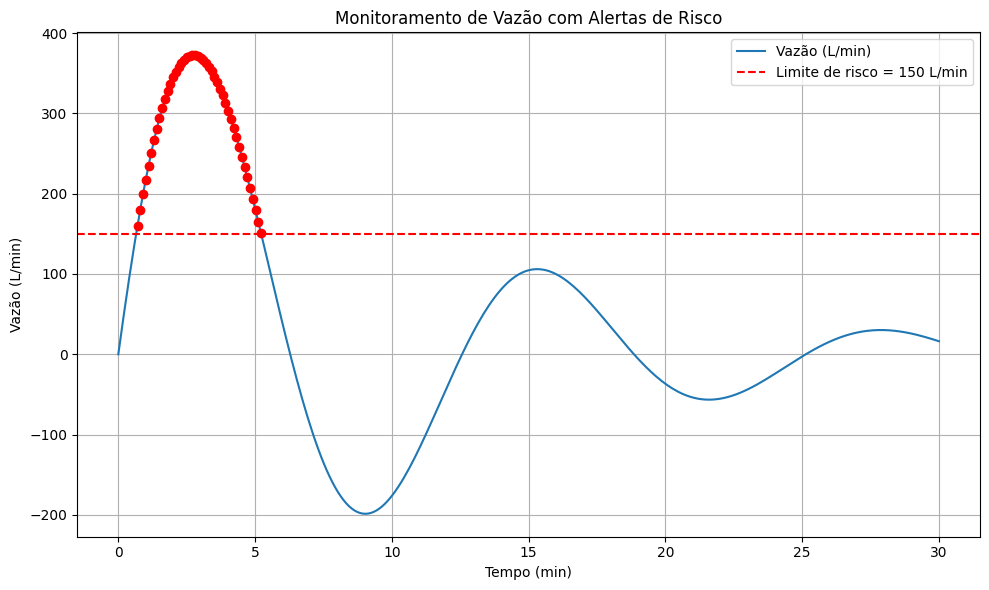

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def vazao(t):
    return 500 * np.exp(-0.1 * t) * np.sin(0.5 * t)

def verificar_risco(t_vals, threshold=150):
    riscos = []
    for t in t_vals:
        v = vazao(t)
        if v > threshold:
            riscos.append((t, v))
    return riscos

# Simulação de 0 a 30 minutos
t_sim = np.linspace(0, 30, 300)
vazao_sim = vazao(t_sim)

# Verificar riscos (vazão acima do limite de segurança)
limite_risco = 150
riscos_detectados = verificar_risco(t_sim, threshold=limite_risco)

# Exibir alertas
print("ALERTAS DE RISCO:")
for t, v in riscos_detectados:
    print(f"⚠️ Risco em t={t:.2f} min: vazão = {v:.2f} L/min")

# Gráfico com marcação dos pontos de risco
plt.figure(figsize=(10, 6))
plt.plot(t_sim, vazao_sim, label="Vazão (L/min)")
plt.axhline(limite_risco, color='r', linestyle='--', label=f"Limite de risco = {limite_risco} L/min")

# Destacar pontos críticos
for t, v in riscos_detectados:
    plt.plot(t, v, 'ro')

plt.title("Monitoramento de Vazão com Alertas de Risco")
plt.xlabel("Tempo (min)")
plt.ylabel("Vazão (L/min)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()